<a href="https://colab.research.google.com/github/dhdmsdud/TIL/blob/master/%ED%95%99%EC%8A%B5%EB%AA%A8%EB%8D%B8%EA%B0%9C%EC%84%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
from tensorflow.keras.datasets   import boston_housing
from tensorflow.keras.models     import Sequential 
from tensorflow.keras.layers     import Activation , Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import SGD , Adam
from tensorflow.keras.utils      import plot_model, to_categorical 
from tensorflow.keras.callbacks  import EarlyStopping, ModelCheckpoint


from sklearn.model_selection     import train_test_split
from sklearn.preprocessing       import StandardScaler , MinMaxScaler , LabelEncoder
from sklearn.datasets            import load_breast_cancer
from sklearn.model_selection     import KFold


import matplotlib.pyplot as plt

import pandas  as pd
import numpy   as np
import seaborn as sns

- Weight initialization
- Activation function
- Optimizer

In [2]:
from tensorflow.keras.datasets.mnist import load_data

In [3]:
(X_train, y_train), (X_test, y_test) = load_data()
X_train.shape, y_train.shape,X_test.shape, y_test.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
X_train[0].shape

(28, 28)

target --> 5


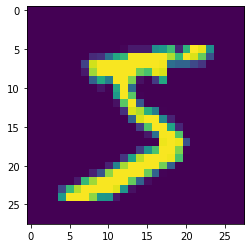

In [5]:
plt.imshow(X_train[0])
print('target -->', y_train[0])

In [6]:
# 1차원으로 reshape
X_train = X_train.reshape(60000, 28*28)
X_test  = X_test.reshape(10000, 784)

In [7]:
X_train[0].shape

(784,)

In [8]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
X_train, _, y_train, _ = train_test_split(X_train, y_train, test_size=0.7, random_state=100)

In [11]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((18000, 784), (18000, 10), (10000, 784), (10000, 10))

In [12]:
def get_model() :

    model = Sequential()
    model.add(Dense(50, activation='sigmoid',input_shape=(784,)))

    model.add(Dense(50, activation='sigmoid'))
    model.add(Dense(50 ,activation='sigmoid'))
    model.add(Dense(50 ,activation='sigmoid'))

    model.add(Dense(10 ,activation='softmax'))

    return model

In [13]:
model = get_model()

optimizer = SGD(learning_rate=0.01)

model.compile(optimizer = optimizer,
              loss      = 'categorical_crossentropy',
              metrics   = ['accuracy'])

In [ ]:
model.summary()

In [ ]:
history = model.fit(X_train, y_train, batch_size=256, validation_split=0.3, epochs=100, verbose=1)

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

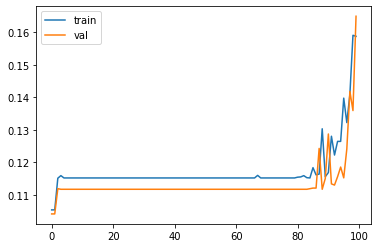

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc='best')
plt.show()

In [18]:
result = model.evaluate(X_test, y_test)
print('test accuracy', result[1])

313/313 [==============================] - 1s 2ms/step - loss: 2.2607 - accuracy: 0.1718
test accuracy 0.17180000245571136


### Resnet --> he_normal
- 가중치를 초기화함

In [19]:
def improve_get_model() :

    model = Sequential()
    model.add(Dense(50, activation='sigmoid',input_shape=(784,) ,kernel_initializer='he_normal'))

    model.add(Dense(50, activation='sigmoid',kernel_initializer='he_normal'))
    model.add(Dense(50 ,activation='sigmoid',kernel_initializer='he_normal'))
    model.add(Dense(50 ,activation='sigmoid',kernel_initializer='he_normal'))

    model.add(Dense(10 ,activation='softmax'))

    return model

In [20]:
model = improve_get_model()

optimizer = SGD(learning_rate=0.01)

model.compile(optimizer = optimizer,
              loss      = 'categorical_crossentropy',
              metrics   = ['accuracy'])

In [ ]:
model.summary()

In [ ]:
history = model.fit(X_train, y_train, batch_size=256, validation_split=0.3, epochs=100, verbose=1)

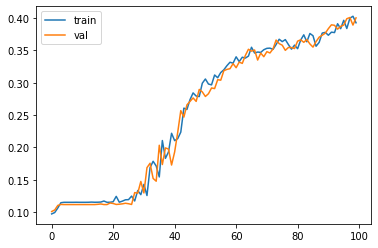

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc='best')
plt.show()

In [24]:
result = model.evaluate(X_test, y_test)
print('test accuracy', result[1])

313/313 [==============================] - 1s 2ms/step - loss: 1.8967 - accuracy: 0.4093
test accuracy 0.4092999994754791


### relu

In [25]:
def improve_activation_get_model() :

    model = Sequential()
    model.add(Dense(50, activation='relu',input_shape=(784,)))

    model.add(Dense(50, activation='relu'))
    model.add(Dense(50 ,activation='relu'))
    model.add(Dense(50 ,activation='relu'))

    model.add(Dense(10 ,activation='softmax'))

    return model

In [26]:
model = improve_activation_get_model()

optimizer = SGD(learning_rate=0.01)

model.compile(optimizer = optimizer,
              loss      = 'categorical_crossentropy',
              metrics   = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=256, validation_split=0.3, epochs=100, verbose=1)

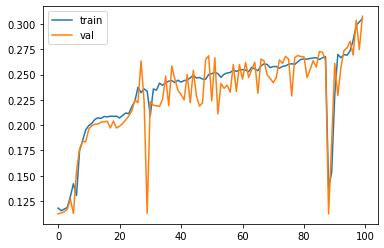

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc='best')
plt.show()

In [29]:
result = model.evaluate(X_test, y_test)
print('test accuracy', result[1])

313/313 [==============================] - 1s 2ms/step - loss: 1.8124 - accuracy: 0.3107
test accuracy 0.310699999332428


### Adam

In [30]:
def improve_optimizer_get_model() :

    model = Sequential()
    model.add(Dense(50, activation='sigmoid',input_shape=(784,)))

    model.add(Dense(50, activation='sigmoid'))
    model.add(Dense(50 ,activation='sigmoid'))
    model.add(Dense(50 ,activation='sigmoid'))

    model.add(Dense(10 ,activation='softmax'))

    return model

In [31]:
model = improve_optimizer_get_model()

optimizer = Adam(learning_rate=0.01)

model.compile(optimizer = optimizer,
              loss      = 'categorical_crossentropy',
              metrics   = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=256, validation_split=0.3, epochs=100, verbose=1)

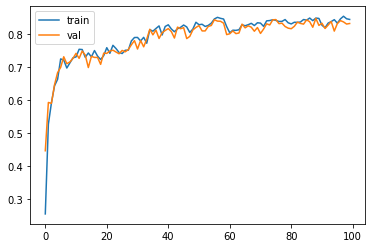

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc='best')
plt.show()

In [34]:
result = model.evaluate(X_test, y_test)
print('test accuracy', result[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.4876 - accuracy: 0.8398
test accuracy 0.8398000001907349


### 배치 정규화
- 평균 : 0, 분산 : 1인 정규화를 통해 학습이 잘 알어나도록 도와주는 방식
- 각 피쳐마다 배치정규화 진행

In [43]:
def normalization_get_model() :

    model = Sequential()
    model.add(Dense(50, input_shape=(784,)))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))

    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))

    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))

    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))

    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=0.01)

    model.compile(optimizer = optimizer,
              loss      = 'categorical_crossentropy',
              metrics   = ['accuracy'])

    return model

In [ ]:
model = normalization_get_model()
model.summary()

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=1)

In [46]:
result = model.evaluate(X_test, y_test)
print('test accuracy', result[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.2271 - accuracy: 0.9618
test accuracy 0.9617999792098999


### dropout, earlystopping

In [49]:
def dropout_get_model() :

    model = Sequential()
    model.add(Dense(50, input_shape=(784,)))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=0.01)

    model.compile(optimizer = optimizer,
              loss      = 'categorical_crossentropy',
              metrics   = ['accuracy'])

    return model

In [50]:
model = dropout_get_model()

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=1)

In [52]:
result = model.evaluate(X_test, y_test)
print('test accuracy', result[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.9537 - accuracy: 0.6742
test accuracy 0.6741999983787537


In [53]:
def dropout_batch_get_model() :

    model = Sequential()
    model.add(Dense(50, input_shape=(784,)))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=0.01)

    model.compile(optimizer = optimizer,
              loss      = 'categorical_crossentropy',
              metrics   = ['accuracy'])

    return model

In [54]:
model = dropout_batch_get_model()

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=1)

In [56]:
result = model.evaluate(X_test, y_test)
print('test accuracy', result[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1704 - accuracy: 0.9576
test accuracy 0.9575999975204468


In [59]:
def dropout_early_get_model() :

    model = Sequential()
    model.add(Dense(50, input_shape=(784,)))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=0.01)

    model.compile(optimizer = optimizer,
              loss      = 'categorical_crossentropy',
              metrics   = ['accuracy'])

    return model

In [60]:
model = dropout_early_get_model()

In [61]:
callbacks = [EarlyStopping(monitor='val_accuracy', patience=3)]
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=1, callbacks=callbacks)

Epoch 1/100
394/394 [==============================] - 2s 4ms/step - loss: 2.2327 - accuracy: 0.1438 - val_loss: 1.7956 - val_accuracy: 0.2772
Epoch 2/100
394/394 [==============================] - 1s 3ms/step - loss: 1.8951 - accuracy: 0.2641 - val_loss: 1.8245 - val_accuracy: 0.2844
Epoch 3/100
394/394 [==============================] - 1s 3ms/step - loss: 1.8698 - accuracy: 0.2630 - val_loss: 1.6517 - val_accuracy: 0.3444
Epoch 4/100
394/394 [==============================] - 1s 3ms/step - loss: 1.7256 - accuracy: 0.3035 - val_loss: 1.4799 - val_accuracy: 0.4426
Epoch 5/100
394/394 [==============================] - 1s 3ms/step - loss: 1.7179 - accuracy: 0.3577 - val_loss: 1.5147 - val_accuracy: 0.4444
Epoch 6/100
394/394 [==============================] - 1s 3ms/step - loss: 1.7452 - accuracy: 0.3527 - val_loss: 1.6728 - val_accuracy: 0.3883
Epoch 7/100
394/394 [==============================] - 1s 3ms/step - loss: 1.8994 - accuracy: 0.3007 - val_loss: 1.5252 - val_accuracy: 0.4331